# Plan
1. read data, split to labels and data, reshape data for Convulotional networks
2. explore data, view all categories
3. make dense model 
4. convulotional model

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras import Model


In [3]:
import cv2

In [4]:
PATH ='data/'
print(os.listdir(PATH))

['t10k-images-idx3-ubyte', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'fashion-mnist_train.csv', 'train-labels-idx1-ubyte']


In [5]:
# read images
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [6]:
# train data
print(train_data.shape)
train_data.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# test data
print(train_data.shape)
test_data.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Define labels and X


In [8]:
# dictionary of labels 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [9]:
y_train=train_data['label'].to_numpy()
y_test=test_data['label'].to_numpy()
train_data.drop(columns=['label'], inplace=True)
test_data.drop(columns=['label'], inplace=True)

In [10]:
# make a copy as a non hot encoded label
y_test_copy=y_test.copy()
y_train_copy=y_train.copy()

In [11]:
# one hot encoding of labels
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [12]:
# transform the train and test data to numpy arrays (dense)
X_train=train_data.to_numpy()
X_test=test_data.to_numpy()
X_train.shape

(60000, 784)

In [13]:
# transform the train and test data to numpy image arrays (if Conv is going to be used)
X_train_image=X_train.reshape(len(train_data),28,28)
X_test_image=X_test.reshape(len(test_data),28,28)
X_train_image.shape

(60000, 28, 28)

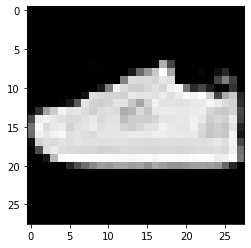

In [14]:
# look at the image
plt.imshow(X_train_image[59999],cmap='gray')

In [15]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# First model: Dense network from scratch
<h3> no preprocessing </h3>

In [16]:
K.clear_session()
model_1 = Sequential()

2022-02-10 15:34:47.377352: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model_1 = Sequential()
model_1.add(keras.layers.Dense(units=20,  activation='relu', input_shape=(784, )))
keras.layers.Dropout(0.2)
model_1.add(keras.layers.Dense(units=15,  activation='relu'))
model_1.add(keras.layers.Dense(units=10, activation="softmax"))

In [18]:
# model summary 
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [19]:
early_stopping_monitor = EarlyStopping(patience=2)
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# fit the model 
model_1_training = model_1.fit(X_train, y_train, epochs=40, batch_size = 200, validation_split=0.3, callbacks=[early_stopping_monitor], verbose=1)

Epoch 1/40
210/210 [==============================] - 1s 3ms/step - loss: 4.1932 - accuracy: 0.2752 - val_loss: 1.7567 - val_accuracy: 0.3886
Epoch 2/40
210/210 [==============================] - 0s 2ms/step - loss: 1.5699 - accuracy: 0.4944 - val_loss: 1.4394 - val_accuracy: 0.5311
Epoch 3/40
210/210 [==============================] - 0s 2ms/step - loss: 1.3471 - accuracy: 0.5542 - val_loss: 1.3310 - val_accuracy: 0.5599
Epoch 4/40
210/210 [==============================] - 0s 2ms/step - loss: 1.2104 - accuracy: 0.5831 - val_loss: 1.2012 - val_accuracy: 0.5890
Epoch 5/40
210/210 [==============================] - 0s 2ms/step - loss: 1.0909 - accuracy: 0.5941 - val_loss: 1.0847 - val_accuracy: 0.5910
Epoch 6/40
210/210 [==============================] - 0s 2ms/step - loss: 1.0268 - accuracy: 0.6042 - val_loss: 1.0435 - val_accuracy: 0.5938
Epoch 7/40
210/210 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.6177 - val_loss: 1.0018 - val_accuracy: 0.6164
Epoch 

Text(0, 0.5, 'accuracy')

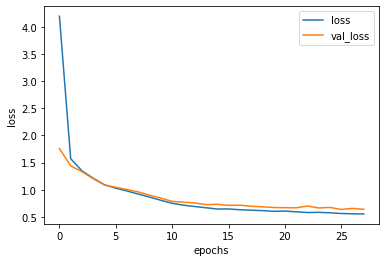

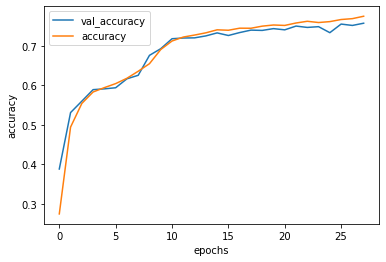

In [21]:
model_1_training.history.keys()
pd.DataFrame(model_1_training.history)[['loss', 'val_loss']].plot()
plt.xlabel('epochs')
plt.ylabel('loss')

#
pd.DataFrame(model_1_training.history)[['val_accuracy', 'accuracy']].plot()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [22]:
# predications
pred = model_1.predict(X_test)

In [23]:
# come back to this
#test=plt.imshow(X_test[8].reshape(28,28),cmap='gray')
#cv2.putText(test, 'my text')

True label on-hot-encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
predicted label on-hot-encoded: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 4.7434693e-18 0.0000000e+00 0.0000000e+00]


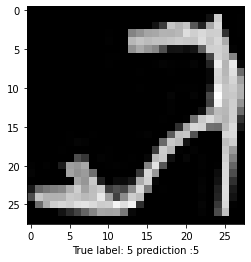

In [24]:
test=plt.imshow(X_test[8].reshape(28,28),cmap='gray')
plt.xlabel('True label: ' +str(y_test[8].argmax())+ ' prediction :'+ str(pred[8].argmax()))
print('True label on-hot-encoded:',y_test[8])
print('predicted label on-hot-encoded:',pred[8])

In [25]:
np.argmax(pred)

85

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle Boot')])

<Figure size 720x720 with 0 Axes>

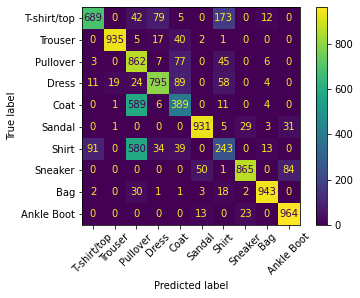

In [44]:
ax =plt.figure(figsize = (10,10))
cm = confusion_matrix(y_true=y_test_copy, y_pred=np.argmax(pred, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels.values())

disp.plot()                                 # change the size of the matrix
plt.xticks(rotation=45)


In [45]:
# save first model
model_1.save('models/dense_layer.h5')